<a href="https://colab.research.google.com/github/payal1009/OIBSIP-TASK1/blob/main/new_mini_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf

In [2]:
from sklearn.preprocessing import LabelBinarizer
from tensorflow import keras
from keras.utils import plot_model
import pickle

In [3]:
train_df = pd.read_csv("/content/drive/MyDrive/new_mini_project/sign_mnist_train.csv")
test_df = pd.read_csv("/content/drive/MyDrive/new_mini_project/sign_mnist_test.csv")

train_df = train_df.sample(frac=1, random_state=42)
X, y = train_df.drop('label', axis=1), train_df['label']

In [4]:
X = X/255.0
X = tf.reshape(X, [-1, 28, 28, 1])

In [5]:
print(len(train_df))

27455


In [6]:
train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
16203,24,118,122,126,129,134,139,143,147,150,...,103,104,103,102,100,99,99,99,97,96
23292,8,173,173,174,174,175,176,176,177,177,...,146,139,127,100,177,232,220,223,223,221
7204,18,83,88,94,100,108,115,121,127,132,...,81,66,137,182,181,184,186,186,187,188
22591,2,167,169,168,167,167,169,169,169,169,...,223,223,222,221,220,220,218,217,218,193
3498,24,120,124,128,132,137,141,144,148,150,...,68,44,84,93,96,96,82,126,144,103


In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27455 entries, 16203 to 23654
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 164.6 MB


In [8]:
train_df.isnull().sum()

label       0
pixel1      0
pixel2      0
pixel3      0
pixel4      0
           ..
pixel780    0
pixel781    0
pixel782    0
pixel783    0
pixel784    0
Length: 785, dtype: int64

In [9]:
train_df.shape

(27455, 785)

In [10]:
y_train = train_df['label']
y_test = test_df['label']

x_train = train_df.drop('label',axis=1)
x_train = np.array(x_train,dtype='float32')/255

x_test = test_df.drop('label',axis=1)
x_test = np.array(x_test,dtype='float32')/255

print('x_train : {}\n'.format(x_train[:]))
print('Y-train shape: {}\n'.format(y_train))
print('x_test shape: {}'.format(x_test.shape))

x_train : [[0.4627451  0.47843137 0.49411765 ... 0.3882353  0.38039216 0.3764706 ]
 [0.6784314  0.6784314  0.68235296 ... 0.8745098  0.8745098  0.8666667 ]
 [0.3254902  0.34509805 0.36862746 ... 0.7294118  0.73333335 0.7372549 ]
 ...
 [0.75686276 0.7607843  0.7647059  ... 0.4745098  0.47058824 0.45882353]
 [0.78431374 0.7882353  0.78039217 ... 0.49803922 0.2784314  0.23529412]
 [0.44705883 0.48235294 0.5176471  ... 0.19607843 0.04705882 0.3764706 ]]

Y-train shape: 16203    24
23292     8
7204     18
22591     2
3498     24
         ..
21575    15
5390      1
860      14
15795     7
23654    15
Name: label, Length: 27455, dtype: int64

x_test shape: (7172, 784)


In [11]:
lb = LabelBinarizer()
y_train = lb.fit_transform(y_train)
y_test = lb.fit_transform(y_test)

In [12]:
x_train, x_valid, y_train, y_valid= train_test_split(x_train, y_train, test_size=.05, random_state=1234,)


In [13]:
x_train.shape

(26082, 784)

In [14]:
y_train.shape

(26082, 24)

In [15]:
x_train = x_train.reshape(-1,28,28,1)
x_test = x_test.reshape(-1,28,28,1)

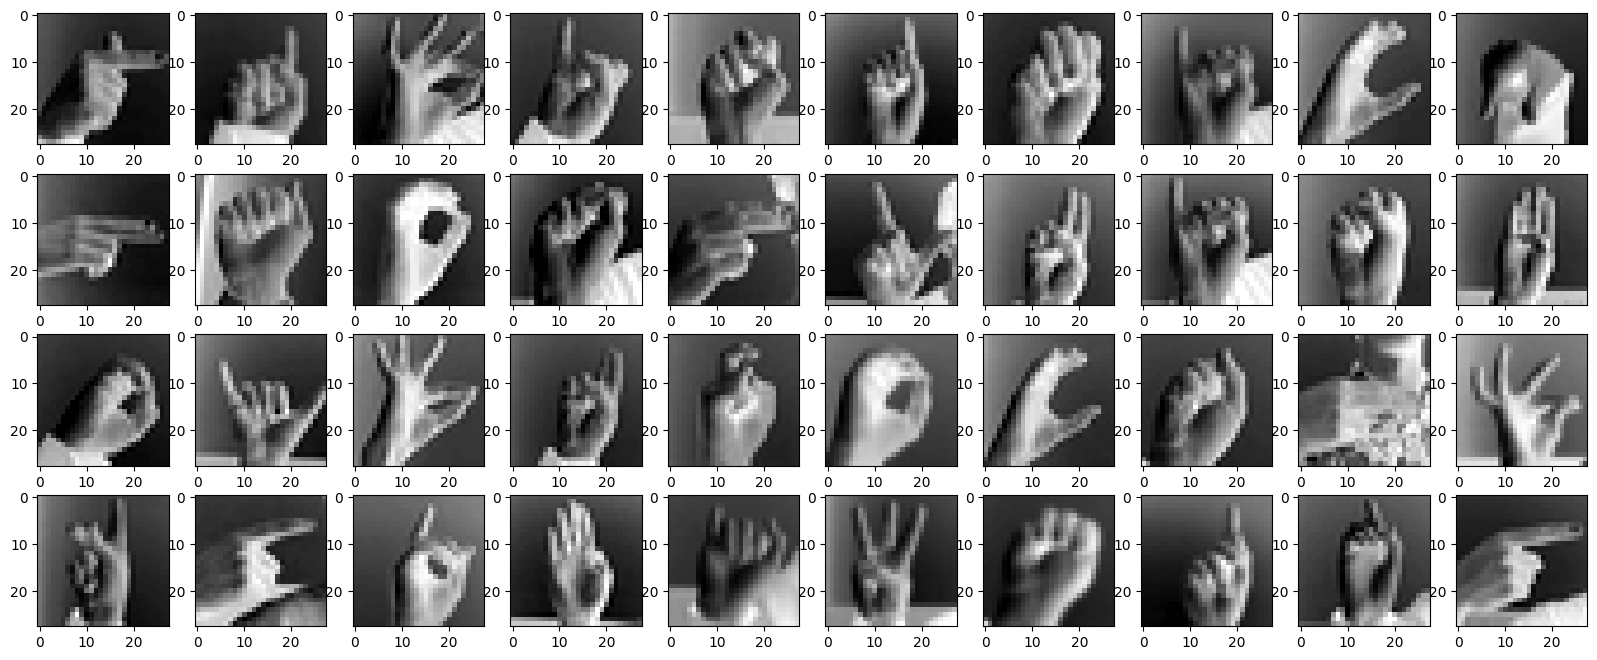

In [16]:
plt.figure(figsize=(20, 8))
x, y = 10, 4 
for i in range(40):  
    plt.subplot(y, x, i+1)
    plt.imshow(x_train[i].reshape(28,28), cmap='gray_r')
plt.show()

In [17]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
        rotation_range=20,
        zoom_range = 0.2,
        width_shift_range=0.1,
        height_shift_range=0.1)

datagen.fit(x_train)

In [18]:
from keras.callbacks import ReduceLROnPlateau

learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience = 2, verbose=1, factor=0.5, min_lr=0.00001)


In [19]:
from keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization
from tensorflow.keras.optimizers import RMSprop,Adam
model = Sequential()

In [20]:
model.add(Conv2D(45, kernel_size=(3,3), activation='relu', input_shape=(28,28,1), strides = 1, padding = 'same'))

model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2), strides = 2, padding = 'same'))

model.add(Conv2D(55, kernel_size=(3,3), strides=1, padding='same', activation='relu'))

model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(MaxPool2D(pool_size=(2,2), strides=2, padding='same'))

model.add(Flatten())
model.add(Dense(units=24,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 45)        450       
                                                                 
 batch_normalization (BatchN  (None, 28, 28, 45)       180       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 45)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 55)        22330     
                                                                 
 dropout (Dropout)           (None, 14, 14, 55)        0         
                                                                 
 batch_normalization_1 (Batc  (None, 14, 14, 55)       2

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 45)        450       
                                                                 
 batch_normalization (BatchN  (None, 28, 28, 45)       180       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 45)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 55)        22330     
                                                                 
 dropout (Dropout)           (None, 14, 14, 55)        0         
                                                                 
 batch_normalization_1 (Batc  (None, 14, 14, 55)       2

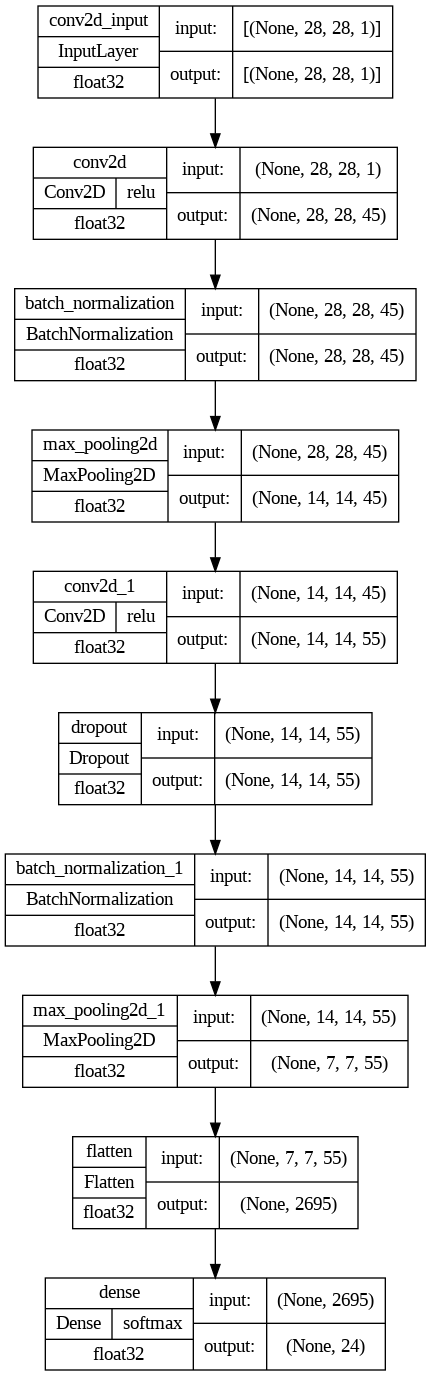

In [22]:
model_img_file = 'model.png'
tf.keras.utils.plot_model(model, to_file=model_img_file, 
                          show_shapes=True, 
                          show_layer_activations=True, 
                          show_dtype=True,
                          show_layer_names=True )

In [23]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [24]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience = 2, verbose=1, factor=0.5, min_lr=0.00001)


In [25]:
hist= model.fit(datagen.flow(x_train, y_train, batch_size=128), epochs=10, validation_data = (x_test,y_test), callbacks = [learning_rate_reduction])

Epoch 1/10
204/204 [==============================] - 94s 446ms/step - loss: 1.4364 - accuracy: 0.5676 - val_loss: 3.2105 - val_accuracy: 0.0905 - lr: 0.0010
Epoch 2/10
204/204 [==============================] - 79s 389ms/step - loss: 0.5562 - accuracy: 0.8190 - val_loss: 2.2706 - val_accuracy: 0.2606 - lr: 0.0010
Epoch 3/10
204/204 [==============================] - 81s 394ms/step - loss: 0.3260 - accuracy: 0.8966 - val_loss: 0.3095 - val_accuracy: 0.9288 - lr: 0.0010
Epoch 4/10
204/204 [==============================] - 79s 389ms/step - loss: 0.2378 - accuracy: 0.9226 - val_loss: 0.1244 - val_accuracy: 0.9660 - lr: 0.0010
Epoch 5/10
204/204 [==============================] - 79s 385ms/step - loss: 0.1864 - accuracy: 0.9398 - val_loss: 0.1091 - val_accuracy: 0.9617 - lr: 0.0010
Epoch 6/10
204/204 [==============================] - ETA: 0s - loss: 0.1553 - accuracy: 0.9509
Epoch 6: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
204/204 [=============================

In [32]:
print("Accuracy of the model is - " , model.evaluate(x_test,y_test)[1]*100 , "%")


225/225 [==============================] - 10s 43ms/step - loss: 0.0217 - accuracy: 0.9937
Accuracy of the model is -  99.3725597858429 %


In [33]:
model.save("image_classification.hdf5")

In [28]:
pip install streamlit


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 52.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 164.8/164.8 kB 13.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 kB 19.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 86.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 7.1 MB/s eta 0:00:00
  Created wheel for validators: filename=validators-0.20.0-py3-none-any.whl size=19579 sha256=93df2416bf71c87b95c36f87ec17f2301862c98c0e6be6963d4a5f125ab9060a
  Stored in directory: /root/.cache/pip/wheels/f2/ed/dd/d3a556ad245ef9dc570c6bcd2f22886d17b0b408dd3bbb9ac3
Successfully built validators


In [29]:
import streamlit as st


In [30]:
def load_image():
    uploaded_file = st.file_uploader(label='Pick an image to test')
    if uploaded_file is not None:
        image_data = uploaded_file.getvalue()
        st.image(image_data)


def main():
    st.title('Image upload demo')
    load_image()


if __name__ == '__main__':
    main()

2023-05-02 04:06:56.857 
  command:

    streamlit run /usr/local/lib/python3.10/dist-packages/ipykernel_launcher.py [ARGUMENTS]


In [31]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import img_to_array, load_img
import numpy as np
import streamlit as st

@st.cache(allow_output_mutation=True)
def get_model():
        model = load_model('Model/Traffic_Sign_Classifier_CNN.hdf5')
        print('Model Loaded')
        return model 

        
def predict(image):
        loaded_model = get_model()
        image = load_img(image, target_size=(32, 32), color_mode = "grayscale")
        image = img_to_array(image)
        image = image/255.0
        image = np.reshape(image,[1,32,32,1])

        classes = loaded_model.predict_classes(image)

        return classes